In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython import get_ipython
ipy = get_ipython()
if ipy is not None:
    ipy.run_line_magic('matplotlib', 'inline')

In [2]:
emma = cv2.imread('D:\Dev\OpenCV\images\emma_watson.jpg', 0)
denis = cv2.imread('D:\Dev\OpenCV\images\denis_mukwege.jpg', 0)
solvay = cv2.imread('D:\Dev\OpenCV\images\solvay_conference_1927.jpg', 0)

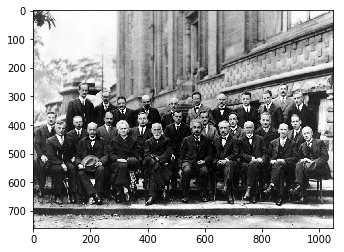

In [3]:
plt.imshow(solvay, cmap='gray')

In [4]:
face_cascade = cv2.CascadeClassifier('D:\Dev\OpenCV\data\haarcascades\haarcascade_frontalface_default.xml')

In [5]:
def detect_face(img):
    face_img = img.copy()
    face_rect = face_cascade.detectMultiScale(face_img)

    for (x, y, w, h) in face_rect:
        cv2.rectangle(face_img, (x, y), (x+w, y+h), (255, 255, 255), 10)

    return face_img

In [6]:
result = detect_face(denis)

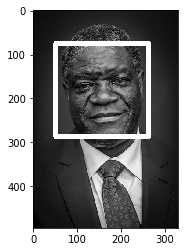

In [7]:
plt.imshow(result, cmap='gray')

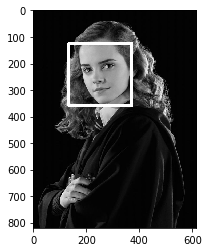

In [8]:
result = detect_face(emma)
plt.imshow(result, cmap='gray')

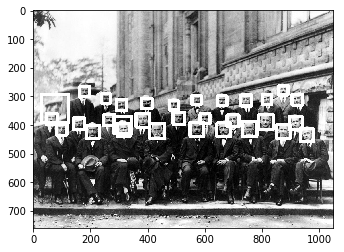

In [9]:
result = detect_face(solvay)
plt.imshow(result, cmap='gray')

In [11]:
def adj_detect_face(img):
    face_img = img.copy()
    face_rect = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)

    for (x, y, w, h) in face_rect:
        cv2.rectangle(face_img, (x, y), (x+w, y+h), (255, 255, 255), 10)

    return face_img

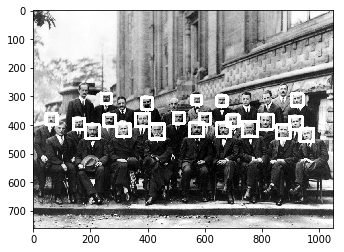

In [12]:
result = adj_detect_face(solvay)
plt.imshow(result, cmap='gray')

In [13]:
eye_cascade = cv2.CascadeClassifier('D:\Dev\OpenCV\data\haarcascades\haarcascade_eye.xml')

In [16]:
def detect_eyes(img):
    face_img = img.copy()
    eyes_rect = eye_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)

    for (x, y, w, h) in eyes_rect:
        cv2.rectangle(face_img, (x, y), (x+w, y+h), (255, 255, 255), 10)

    return face_img

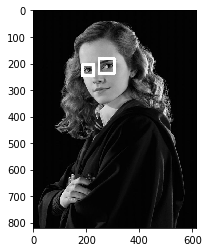

In [17]:
result = detect_eyes(emma)
plt.imshow(result, cmap='gray')

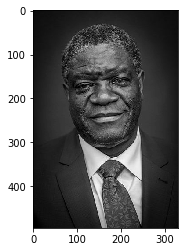

In [19]:
result = detect_eyes(denis)
plt.imshow(result, cmap='gray')

In [21]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read(0)
    frame = detect_face(frame)
    
    cv2.imshow('Video Face Detect', frame)
    
    k = cv2.waitKey(1)
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()